In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk

In [ ]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3620,ham,That means from february to april i'll be gett...,NaN,NaN,NaN
1849,ham,You got job in wipro:)you will get every thing...,NaN,NaN,NaN
3197,ham,7 lor... Change 2 suntec... Wat time u coming?,NaN,NaN,NaN
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...,NaN,NaN,NaN
1252,ham,Yeah like if it goes like it did with my frien...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns= {'v1': 'type', 'v2': 'text'},inplace= True)

In [ ]:
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

In [ ]:
df.sample(10)

,type,text
308,1,TheMob> Check out our newest selection of cont...
1374,1,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA..."
3101,0,Even if he my friend he is a priest call him now
4722,0,HELLO PEACH! MY CAKE TASTS LUSH!
4865,0,"Oh! Shit, I thought that was your trip! Looooo..."
3704,0,Ok. Very good. Its all about making that money.
4913,0,You've already got a flaky parent. It'snot sup...
3593,1,Do you want a New Nokia 3510i Colour Phone Del...
214,0,Sounds great! Are you home now?
3048,0,Lol they don't know about my awesome phone. I ...


In [ ]:
df.isnull().sum()

,0
type,0
text,0


In [ ]:
df.duplicated().sum()
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

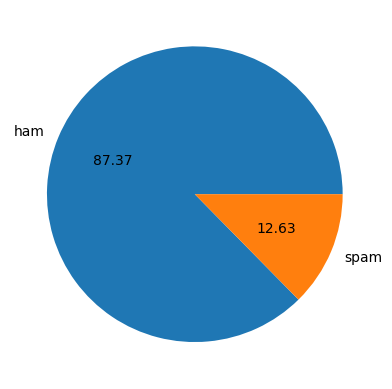

In [ ]:
df['type'].value_counts()
plt.pie(df['type'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()  # Data is Imbalanced

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['num_of_char'] = df['text'].apply(len)
df['num_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_of_unique_words'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,type,text,num_of_char,num_of_words,num_of_unique_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_of_char', 'num_of_words', 'num_of_unique_words']].describe()

,num_of_char,num_of_words,num_of_unique_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['type'] == 0][['num_of_char', 'num_of_words', 'num_of_unique_words']].describe()       #For Ham

,num_of_char,num_of_words,num_of_unique_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['type'] == 1][['num_of_char', 'num_of_words', 'num_of_unique_words']].describe()   #For Spam

,num_of_char,num_of_words,num_of_unique_words
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_char', ylabel='Count'>

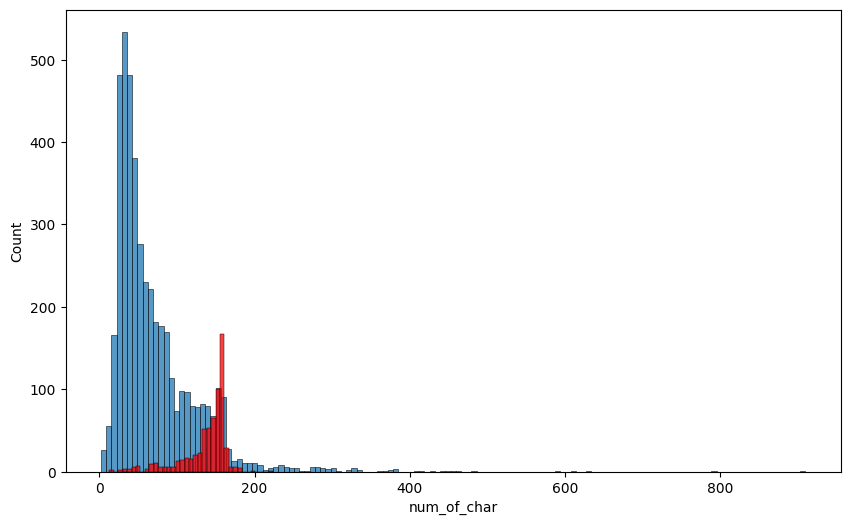

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['type'] == 0]['num_of_char'])
sns.histplot(df[df['type'] == 1]['num_of_char'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

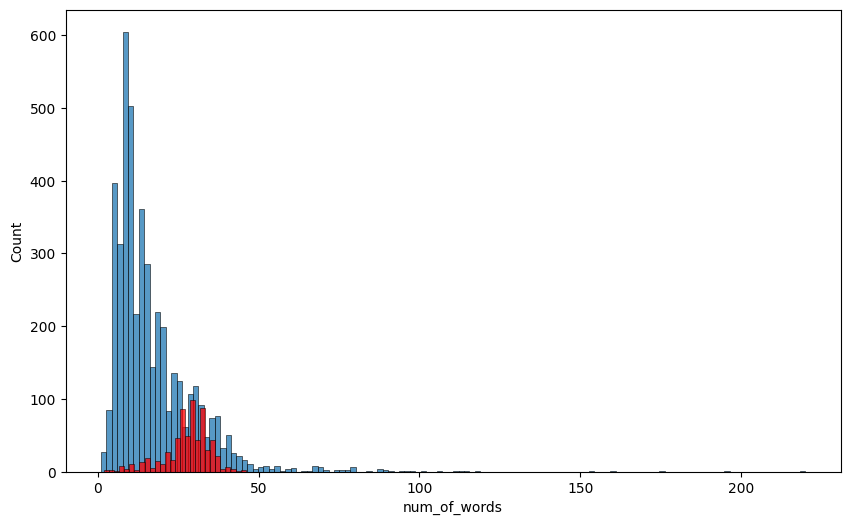

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['type'] == 0]['num_of_words'])
sns.histplot(df[df['type'] == 1]['num_of_words'], color='red')

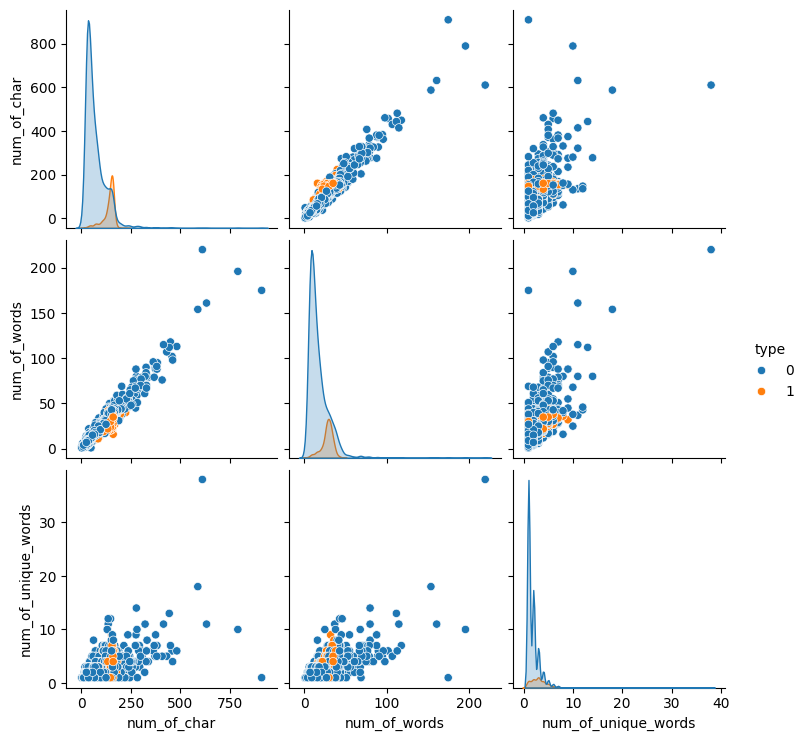

In [ ]:
sns.pairplot(df, hue='type')

In [ ]:
# Calculate correlation only for numeric columns
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                         type  num_of_char  num_of_words  num_of_unique_words
type                 1.000000     0.384717      0.262912             0.263939
num_of_char          0.384717     1.000000      0.965760             0.624139
num_of_words         0.262912     0.965760      1.000000             0.679971
num_of_unique_words  0.263939     0.624139      0.679971             1.000000


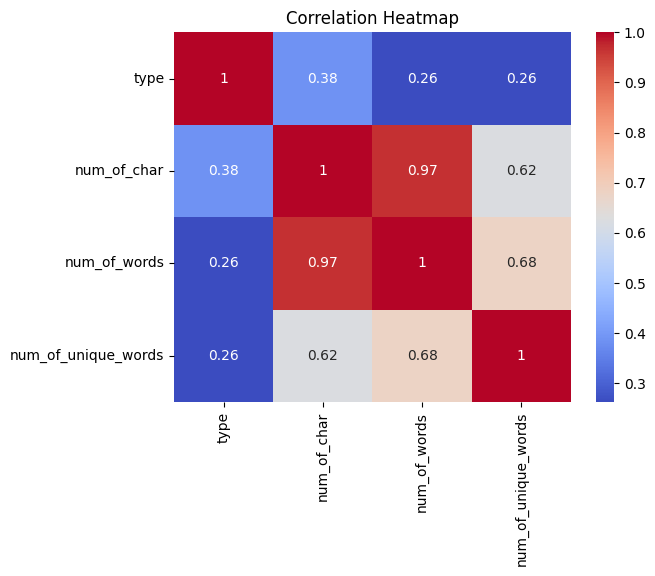

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text Preprocessing and Tokenization

In [ ]:
import nltk
nltk.download('stopwords')
import string

from nltk.stem.porter import PorterStemmer   # Converting words to root form
ps = PorterStemmer()


def transform_text(text):
  text = text.lower()              # Converting text to lower case
  text = nltk.word_tokenize(text)  # Tokenization

  y = []                           # Removing special characters
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]                      # Removing stopwords and punctuations
  y.clear()

  for i in text:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation: # Using nltk.corpus.stopwords
      y.append(i)

  text = y[:]                      # Stemming words
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [ ]:
df['text'].apply(transform_text)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,type,text,num_of_char,num_of_words,num_of_unique_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Creating word cloud of spam and ham message.
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=' '))

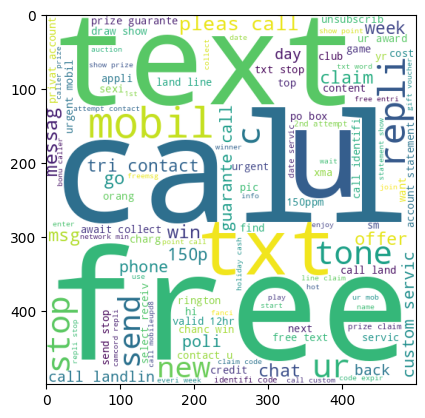

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=' '))

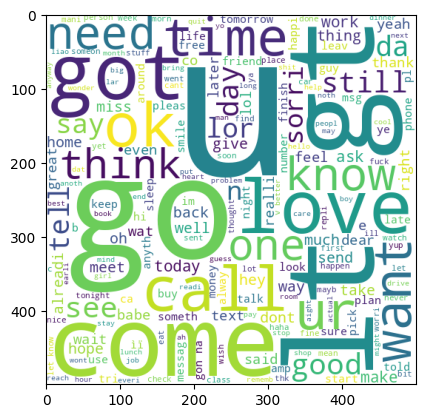

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

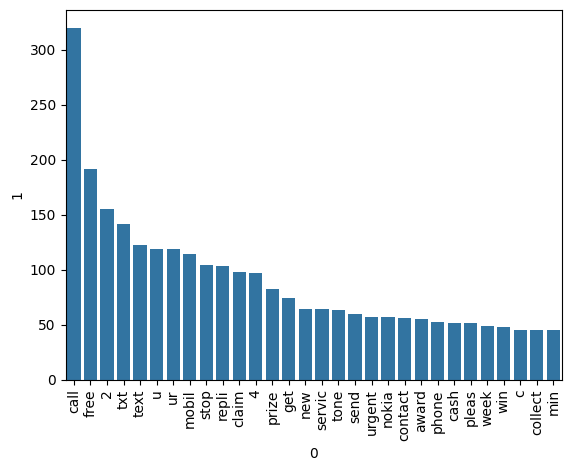

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

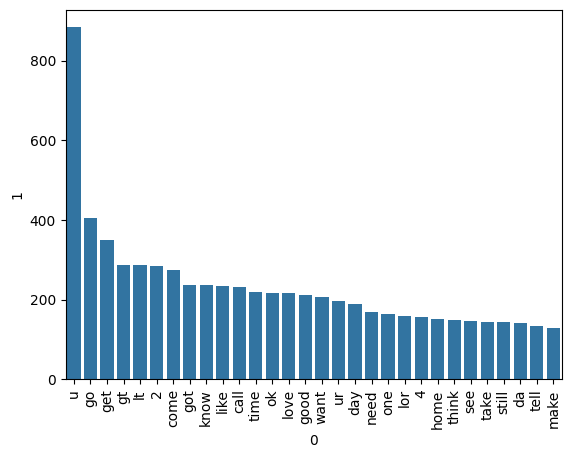

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Vectorizing data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
x = np.hstack((x, df['num_of_char'].values.reshape(-1, 1)))

In [ ]:
x

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [ ]:
x.shape

(5169, 3001)

In [ ]:
y= df['type'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
#we have to reduce true positive.

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8936170212765957
[[808  88]
 [ 22 116]]
0.5686274509803921


In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9400386847195358
[[896   0]
 [ 62  76]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
train_classifier(svc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8665377176015474, 0.0)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print(f'{name} accuracy is {current_accuracy}')
  print(f'{name} precision is {current_precision}')

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC accuracy is 0.8665377176015474
SVC precision is 0.0
KN accuracy is 0.9313346228239845
KN precision is 0.8130841121495327
NB accuracy is 0.9400386847195358
NB precision is 1.0
DT accuracy is 0.9468085106382979
DT precision is 0.8807339449541285
LR accuracy is 0.9593810444874274
LR precision is 0.9528301886792453
RF accuracy is 0.9729206963249516
RF precision is 0.9824561403508771
AdaBoost accuracy is 0.9448742746615088
AdaBoost precision is 0.8932038834951457
BgC accuracy is 0.960348162475822
BgC precision is 0.8646616541353384
ETC accuracy is 0.9806576402321083
ETC precision is 0.9836065573770492
GBDT accuracy is 0.9506769825918762
GBDT precision is 0.9306930693069307
xgb accuracy is 0.971953578336557
xgb precision is 0.943089430894309


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.940039,1.000000
8,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
4,LR,0.959381,0.952830
10,xgb,0.971954,0.943089
9,GBDT,0.950677,0.930693
6,AdaBoost,0.944874,0.893204
3,DT,0.946809,0.880734
7,BgC,0.960348,0.864662
1,KN,0.931335,0.813084


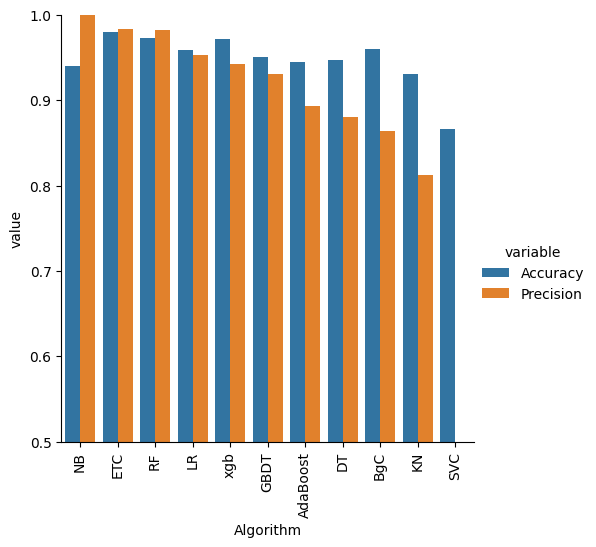

In [ ]:
performance_df_melted = pd.melt(performance_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'], var_name='variable', value_name='value')
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df_melted, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

Model Improvement

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)
temp_df

,Algorithm,Accuracy,Precision
2,NB,0.940039,1.000000
8,ETC,0.980658,0.983607
5,RF,0.972921,0.982456
4,LR,0.959381,0.952830
10,xgb,0.971954,0.943089
9,GBDT,0.950677,0.930693
6,AdaBoost,0.944874,0.893204
3,DT,0.946809,0.880734
7,BgC,0.960348,0.864662
1,KN,0.931335,0.813084


In [ ]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy_x,Precision_x,Accuracy_y,Precision_y
0,NB,0.940039,1.000000,0.940039,1.000000
1,ETC,0.980658,0.983607,0.980658,0.983607
2,RF,0.972921,0.982456,0.972921,0.982456
3,LR,0.959381,0.952830,0.959381,0.952830
4,xgb,0.971954,0.943089,0.971954,0.943089
5,GBDT,0.950677,0.930693,0.950677,0.930693
6,AdaBoost,0.944874,0.893204,0.944874,0.893204
7,DT,0.946809,0.880734,0.946809,0.880734
8,BgC,0.960348,0.864662,0.960348,0.864662
9,KN,0.931335,0.813084,0.931335,0.813084


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import VotingClassifier
Voting = VotingClassifier(estimators=[('SVM', svc), ('NB', mnb), ('ETC', etc)], voting='soft')

In [ ]:
Voting.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
VotingClassifier(estimators=[('SVM', SVC(gamma=1.0, kernel='sigmoid', probability=True)),
                               ('NB', MultinomialNB()),
                                ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2))],
                                  voting='soft')

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = Voting.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9429400386847195
Precision 1.0


In [ ]:
estimators = [('SVM', svc), ('NB', mnb), ('ETC', etc)]
final_estimators = RandomForestClassifier()

In [ ]:
#Applying stacking
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimators)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))

Accuracy 0.9738878143133463
Precision 0.9051094890510949


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))